In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

In [2]:
%precision 3
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.precision', 3)
sns.set_theme()

In [3]:
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

In [4]:
print('\n'.join(iris.DESCR.split('\n')[:30]))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================



In [5]:
print(f"Shape of dataset: {x.shape}")
print(f"Features names: {iris.feature_names}")
print(f"Shape of the target: {y.shape}")
print(f"Target class names: {iris.target_names}")

Shape of dataset: (150, 4)
Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of the target: (150,)
Target class names: ['setosa' 'versicolor' 'virginica']


In [6]:
df = sns.load_dataset("iris") # colabで接続できるが,こちらでは修正が必要
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


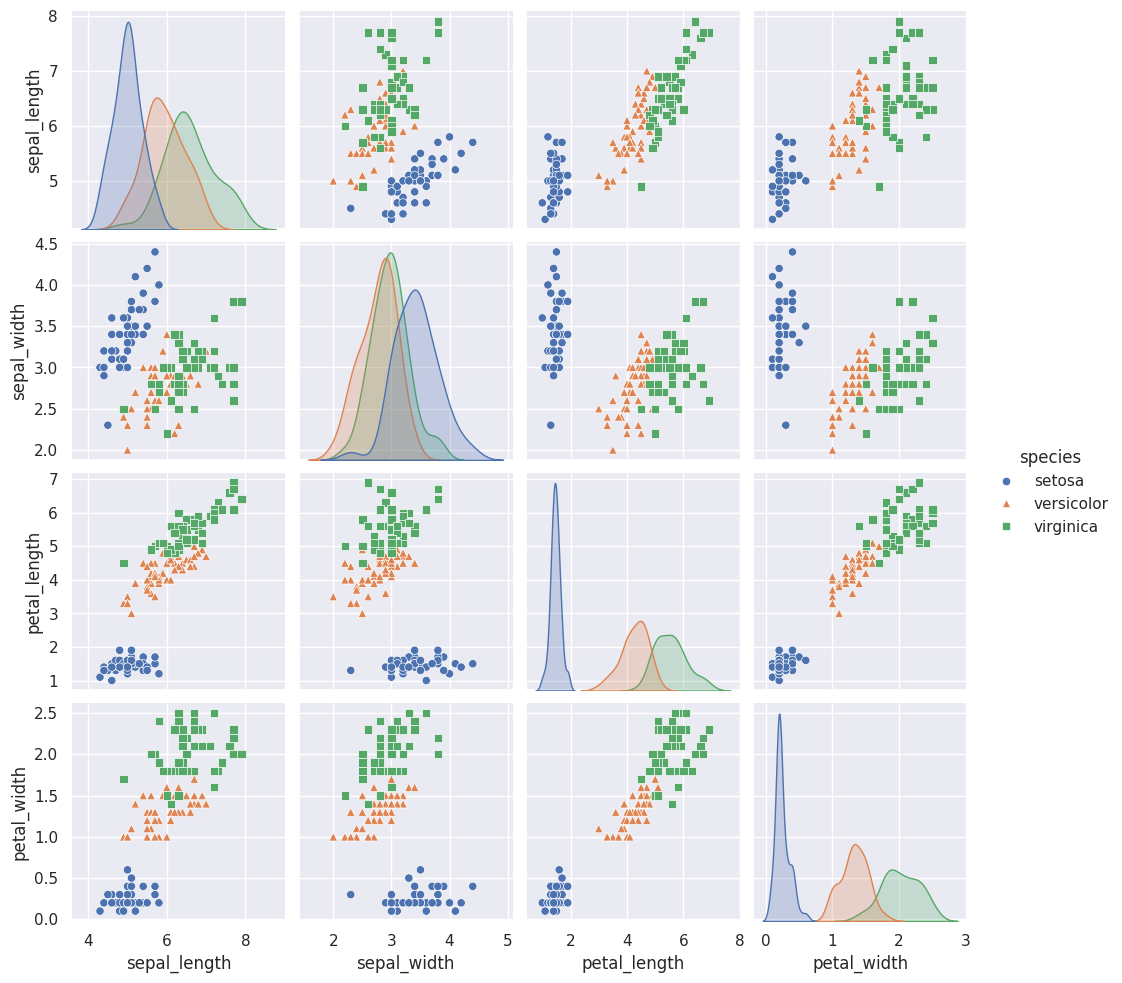

In [8]:
markers = ['o', '^', 's']
sns.pairplot(df, hue='species', markers=markers)
plt.show()

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
print(f"Mean of each feature (first 5 features):\n {np.mean(x_scaled, axis=0)}")
print(f"Standard deviation of each feature (first 5 features):\n {np.std(x_scaled, axis=0)}")

Mean of each feature (first 5 features):
 [-0. -0. -0. -0.]
Standard deviation of each feature (first 5 features):
 [1. 1. 1. 1.]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.33, random_state=7)

In [12]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = sum(y_test == y_pred) / len(y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.92


In [13]:
scores = cross_val_score(clf, x_scaled, y, cv=10)
print(f'Accuracy scores for each fold: {scores.mean():.2f}±{scores.std()*2:.2f}')

Accuracy scores for each fold: 0.95±0.13


In [14]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
# 分割学習法
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=7)
score_div = pipe.fit(X_train, y_train).score(X_test, y_test)
print(f'Accuracy with pipeline (train/test split): {score_div:.2f}')

Accuracy with pipeline (train/test split): 0.92


In [15]:
# 交差確認法
score_cross = cross_val_score(pipe, x, y, cv=10)
print(f'Accuracy with pipeline (cross-validation): {score_cross.mean():.2f}±{score_cross.std()*2:.2f}')

Accuracy with pipeline (cross-validation): 0.95±0.10


In [16]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.82      1.00      0.90        18
   virginica       1.00      0.78      0.88        18

    accuracy                           0.92        50
   macro avg       0.94      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



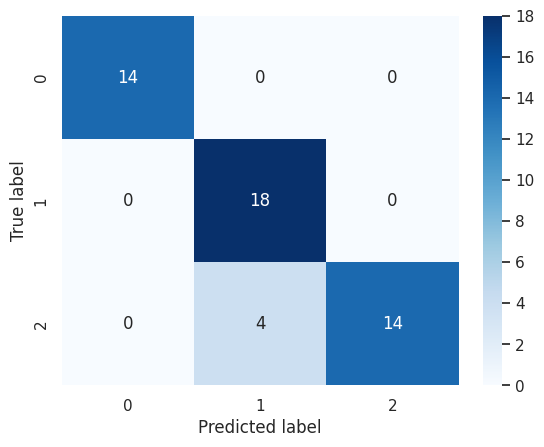

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

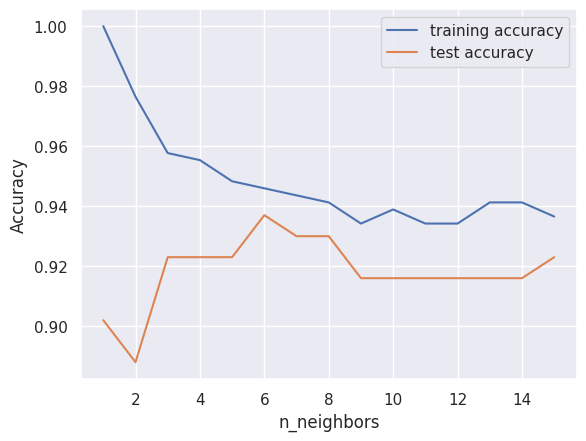

Best k: 6
Best test accuracy: 0.937


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# データの読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# kの範囲を1から15まで試す
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

# 精度の可視化
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# 最も高いテスト精度とその時のkを表示
best_k = neighbors_settings[test_accuracy.index(max(test_accuracy))]
print(f"Best k: {best_k}")
print(f"Best test accuracy: {max(test_accuracy):.3f}")

In [19]:
from sklearn.metrics import confusion_matrix

# 最適なkでモデルを再構築 (前のセルの best_k を使用)
# もし前のセルを実行していない場合は、適当な値(例: 11)を設定してください
if 'best_k' not in locals():
    best_k = 11

clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 混同行列の作成
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 混同行列から各要素を取得 (2値分類の場合)
tn, fp, fn, tp = cm.ravel()

# 各指標の計算
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Confusion Matrix:
 [[48  5]
 [ 4 86]]
Accuracy:  0.937
Precision: 0.945
Recall:    0.956
F1 Score:  0.950
